In [256]:
# import needed modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from statsmodels.formula.api import ols
import statsmodels.api as sm
from itertools import product
import warnings
warnings.filterwarnings('ignore')



In [257]:
pd.set_option('max_columns', None)

In [258]:

med_df=pd.read_csv('C:/Users/kr529097/Desktop/MSDA/208/task 1/medical_clean.csv')

In [259]:
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [260]:
# change population density areas from stg to int
# create pop_den dict
dict_pop_den = {'Area': {'Urban':1, 'Suburban':2, 'Rural':3}}
med_df.replace(dict_pop_den, inplace = True)

# rename job
med_df.rename(columns={'Job':'Insured_Job'})

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Insured_Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,2,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,1,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,2,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,2,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,3,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,4762,1,America/New_York,"Programmer, multimedia",2,25,45967.61,Widowed,Male,No,16.980860,4,2,1,No,Emergency Admission,Yes,No,Medium,No,No,No,No,No,Yes,No,Yes,No,Intravenous,51.561220,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9996,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,1251,1,America/New_York,"Restaurant manager, fast food",4,87,14983.02,Widowed,Male,Yes,18.177020,5,0,0,No,Elective Admission,Yes,No,Medium,Yes,Yes,Yes,No,No,No,No,No,Yes,CT Scan,68.668240,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9997,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,532,3,America/Chicago,"Psychologist, occupational",3,45,65917.81,Separated,Female,Yes,17.129070,4,2,0,Yes,Elective Admission,Yes,No,High,Yes,No,No,No,No,Yes,Yes,No,No,Intravenous,70.154180,8276.481000,15281.210000,3,3,3,4,4,2,3,2
9998,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,57775,44.10354,-102.01590,271,3,America/Denver,Outdoor activities/education manager,3,43,29702.32,Divorced,Male,Yes,19.910430,5,2,1,No,Emergency Admission,No,No,Medium,Yes,No,No,No,Yes,No,No,No,No,Blood Work,63.356900,7644.483000,7781.678000,5,5,3,4,4,3,4,3


In [263]:
#change gender
gen_dict = {'Gender': {'Male':1, 'Female':2, 'Nonbinary':3}}
med_df.replace(gen_dict, inplace = True)

In [264]:
mar_dict = {'Marital': {'Never Married': 0, 'Married':1, 'Separated':2, 'Divorced':3, 'Widowed':4}}
med_df.replace(mar_dict, inplace=True)


In [265]:
# change all yes/no 
med_df.replace({'Yes':1,
                  'No':0}, inplace=True)

In [266]:
# change complication
comp_dict  = {'Complication_risk': {'High':3, 'Medium':2, 'Low':1}}
med_df.replace(comp_dict, inplace=True)

In [267]:
# rename survey items to accurately reflect questions
med_df.rename(columns = {'Item1':'TimelyAdmin', 'Item2':'TimelyTreat', 'Item3':'TimelyVisit', 'Item4':'Reliability', 'Item5':'Options', 'Item6':'HoursTreat', 'Item7':'StaffAtt', 'Item8':'DocListen'}, inplace=True)


In [268]:
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  int64  
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [269]:
# drop redundant location info 
med_df = med_df.drop(med_df.columns[8:12], axis=1)

med_df.Gender.unique()

In [270]:
med_df.Gender.unique()

array([1, 2, 3], dtype=int64)

In [271]:
med_df.Initial_admin.unique()

array(['Emergency Admission', 'Elective Admission',
       'Observation Admission'], dtype=object)

In [272]:
# change admission type
admin_dict  = {'Initial_admin': {'Observation Admission':3, 'Elective Admission':2, 'Emergency Admission':1}}
med_df.replace(admin_dict, inplace=True)

In [273]:
med_df.Services.unique()

array(['Blood Work', 'Intravenous', 'CT Scan', 'MRI'], dtype=object)

In [274]:
# change services
services_dict  = {'Services': {'Blood Work':4, 'Intravenous':3, 'CT Scan':2, 'MRI':1}}
med_df.replace(services_dict, inplace=True)

In [275]:
print(med_df.describe())

         CaseOrder           Zip      Children           Age         Income  \
count  10000.00000  10000.000000  10000.000000  10000.000000   10000.000000   
mean    5000.50000  50159.323900      2.097200     53.511700   40490.495160   
std     2886.89568  27469.588208      2.163659     20.638538   28521.153293   
min        1.00000    610.000000      0.000000     18.000000     154.080000   
25%     2500.75000  27592.000000      0.000000     36.000000   19598.775000   
50%     5000.50000  50207.000000      1.000000     53.000000   33768.420000   
75%     7500.25000  72411.750000      3.000000     71.000000   54296.402500   
max    10000.00000  99929.000000     10.000000     89.000000  207249.100000   

            Marital        Gender       ReAdmis   VitD_levels    Doc_visits  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       2.006000      1.544600      0.366900     17.964262      5.012200   
std        1.417803      0.539296      0.481983    

In [276]:
med_df['ReAdmis'].value_counts()

0    6331
1    3669
Name: ReAdmis, dtype: int64

In [277]:
med_df['Gender'].value_counts()

2    5018
1    4768
3     214
Name: Gender, dtype: int64

In [278]:
med_df['HighBlood'].value_counts(normalize=True)

0    0.591
1    0.409
Name: HighBlood, dtype: float64

In [279]:
med_df['Stroke'].value_counts(normalize=True)

0    0.8007
1    0.1993
Name: Stroke, dtype: float64

In [280]:
med_df['Complication_risk'].value_counts(normalize=True)

2    0.4517
3    0.3358
1    0.2125
Name: Complication_risk, dtype: float64

In [281]:
med_df['Overweight'].value_counts(normalize=True)

1    0.7094
0    0.2906
Name: Overweight, dtype: float64

In [282]:
med_df['Arthritis'].value_counts(normalize=True)

0    0.6426
1    0.3574
Name: Arthritis, dtype: float64

In [283]:
med_df['Diabetes'].value_counts(normalize=True)

0    0.7262
1    0.2738
Name: Diabetes, dtype: float64

In [284]:
med_df['Hyperlipidemia'].value_counts(normalize=True)

0    0.6628
1    0.3372
Name: Hyperlipidemia, dtype: float64

In [285]:
med_df['BackPain'].value_counts(normalize=True)

0    0.5886
1    0.4114
Name: BackPain, dtype: float64

In [286]:
med_df['Anxiety'].value_counts(normalize=True)

0    0.6785
1    0.3215
Name: Anxiety, dtype: float64

In [287]:
med_df['Allergic_rhinitis'].value_counts(normalize=True)

0    0.6059
1    0.3941
Name: Allergic_rhinitis, dtype: float64

In [288]:
med_df['Reflux_esophagitis'].value_counts(normalize=True)

0    0.5865
1    0.4135
Name: Reflux_esophagitis, dtype: float64

In [289]:
med_df['Asthma'].value_counts(normalize=True)

0    0.7107
1    0.2893
Name: Asthma, dtype: float64

In [290]:
med_df['Services'].value_counts(normalize=True)

4    0.5265
3    0.3130
2    0.1225
1    0.0380
Name: Services, dtype: float64

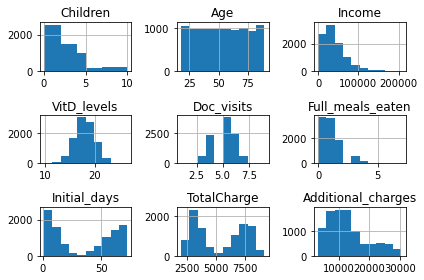

In [291]:
# histograms of continuous variables
med_df[['Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'Initial_days', 'TotalCharge', 'Additional_charges']].hist()
plt.tight_layout()

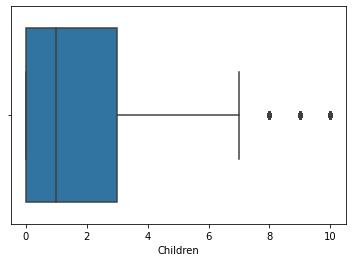

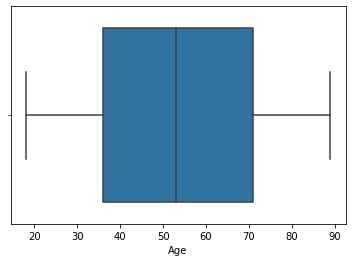

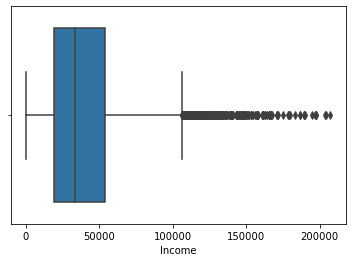

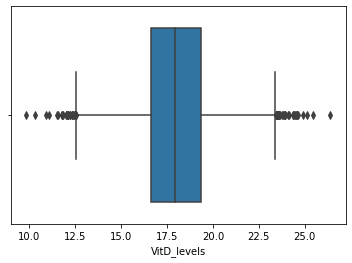

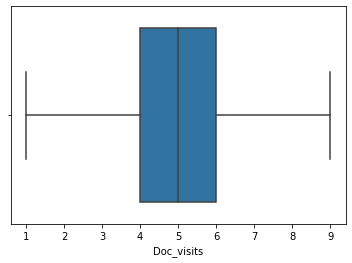

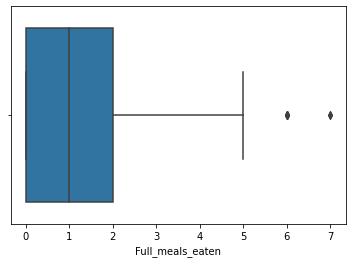

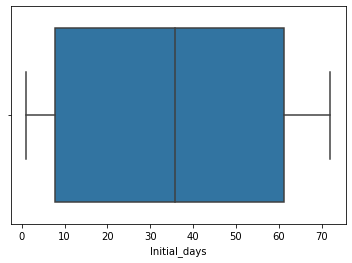

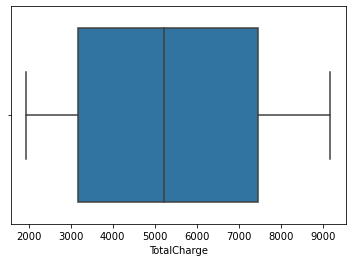

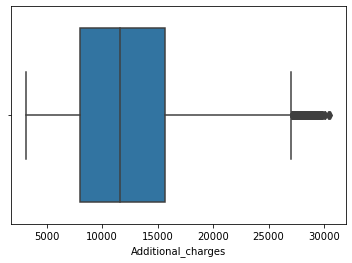

In [292]:
# boxplots for continuous variables
sns.boxplot('Children', data=med_df)
plt.show()
sns.boxplot('Age', data=med_df)
plt.show()
sns.boxplot('Income', data=med_df)
plt.show()
sns.boxplot('VitD_levels', data=med_df)
plt.show()
sns.boxplot('Doc_visits', data=med_df)
plt.show()
sns.boxplot('Full_meals_eaten', data=med_df)
plt.show()
sns.boxplot('Initial_days', data=med_df)
plt.show()
sns.boxplot('TotalCharge', data=med_df)
plt.show()
sns.boxplot('Additional_charges', data=med_df)
plt.show()


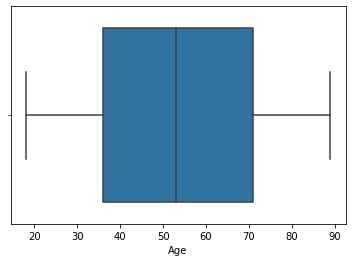

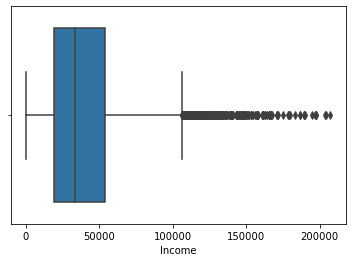

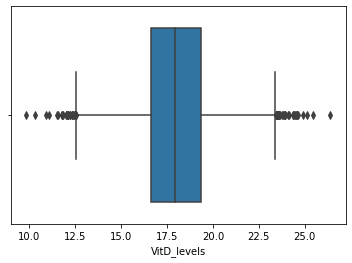

In [293]:
sns.boxplot('Age', data=med_df)
plt.show()
sns.boxplot('Income', data=med_df)
plt.show()
sns.boxplot('VitD_levels', data=med_df)
plt.show()

In [56]:
from scipy.stats.mstats import winsorize

In [294]:
med_df['Income']= winsorize(med_df['Income'], limits=[0.05, 0.05])

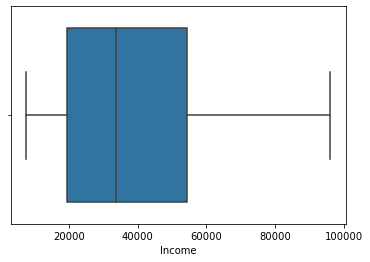

In [295]:
sns.boxplot('Income', data=med_df)
plt.show()

In [296]:
med_df['Children']= winsorize(med_df['Children'], limits=[0.05, 0.05])

In [297]:
med_df['VitD_levels']= winsorize(med_df['VitD_levels'], limits=[0.05, 0.05])

In [298]:
med_df['Full_meals_eaten']= winsorize(med_df['Full_meals_eaten'], limits=[0.05, 0.05])

In [299]:
med_df['Additional_charges']= winsorize(med_df['Additional_charges'], limits=[0.05, 0.05])

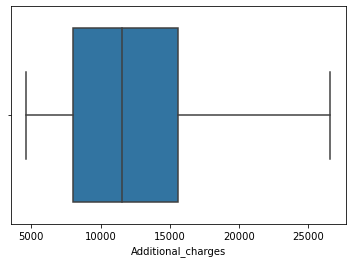

In [300]:
sns.boxplot('Additional_charges', data=med_df)
plt.show()

<AxesSubplot:xlabel='Children', ylabel='Additional_charges'>

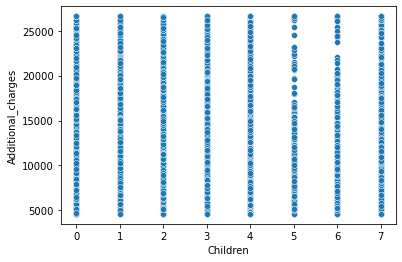

In [301]:
#create scatterplots of all explanatory variables vs response variable
sns.scatterplot(x='Children', y='Additional_charges', data=med_df)

<AxesSubplot:xlabel='Age', ylabel='Additional_charges'>

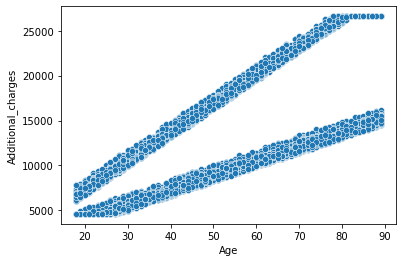

In [302]:

sns.scatterplot(x='Age', y='Additional_charges', data=med_df)

<AxesSubplot:xlabel='Income', ylabel='Additional_charges'>

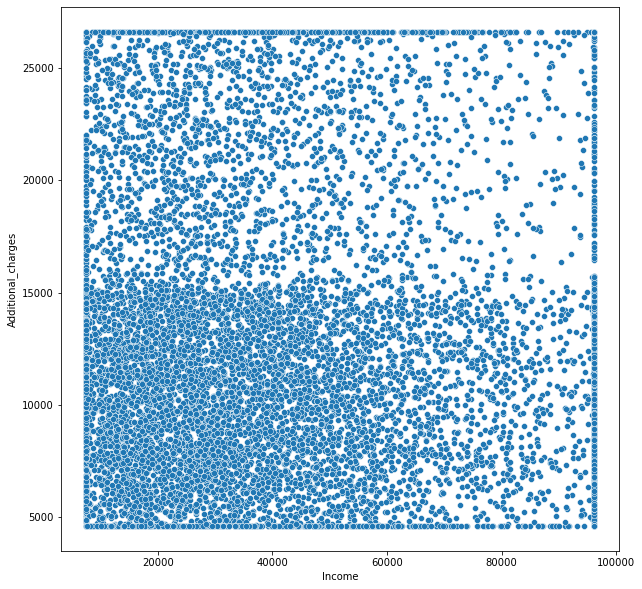

In [303]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Income', y='Additional_charges', data=med_df)

([<matplotlib.axis.XTick at 0x22892ee38e0>,
 [Text(0, 0, 'Never Married'),
  Text(1, 0, 'Married'),
  Text(2, 0, 'Separated'),
  Text(3, 0, 'Divorced'),
  Text(4, 0, 'Widowed')])

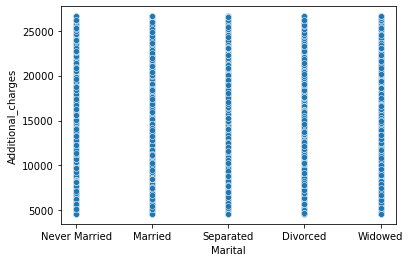

In [304]:

sns.scatterplot(x='Marital', y='Additional_charges', data=med_df)
plt.xticks([0,1,2,3,4], ['Never Married', 'Married', 'Separated', 'Divorced', 'Widowed'])

([<matplotlib.axis.XTick at 0x22892f4f280>,
 [Text(1, 0, 'Male'), Text(2, 0, 'Female'), Text(3, 0, 'NB')])

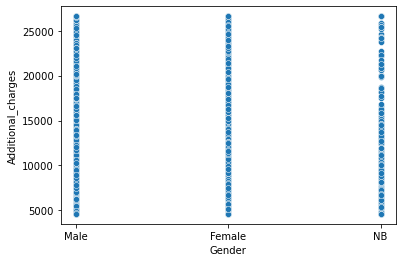

In [305]:

sns.scatterplot(x='Gender', y='Additional_charges', data=med_df)
plt.xticks([1,2,3], ['Male', 'Female', 'NB'])

([<matplotlib.axis.XTick at 0x22892d51f10>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

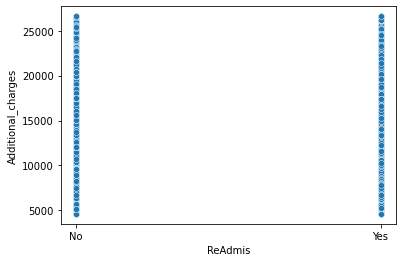

In [306]:
sns.scatterplot(x="ReAdmis", y='Additional_charges', data=med_df)
plt.xticks([0,1], ['No', 'Yes'])

<AxesSubplot:xlabel='VitD_levels', ylabel='Additional_charges'>

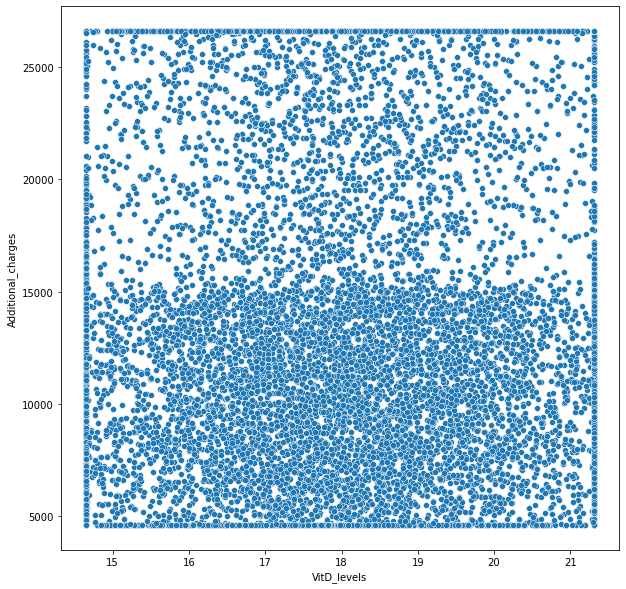

In [307]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='VitD_levels', y='Additional_charges', data=med_df)

<AxesSubplot:xlabel='Doc_visits', ylabel='Additional_charges'>

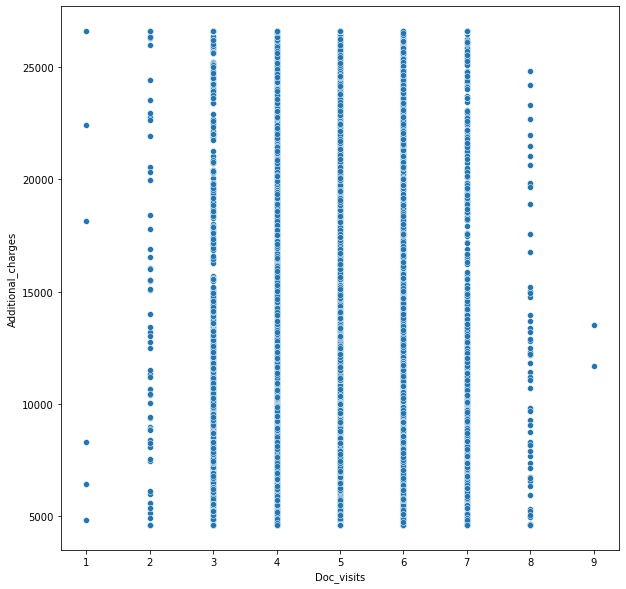

In [308]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Doc_visits', y='Additional_charges', data=med_df)

([<matplotlib.axis.XTick at 0x228909934f0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

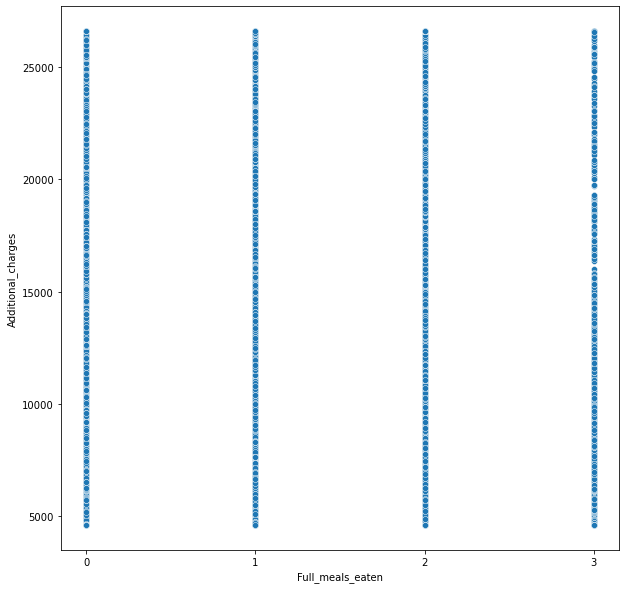

In [309]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Full_meals_eaten', y='Additional_charges', data=med_df)
plt.xticks([0,1,2,3])

<AxesSubplot:xlabel='vitD_supp', ylabel='Additional_charges'>

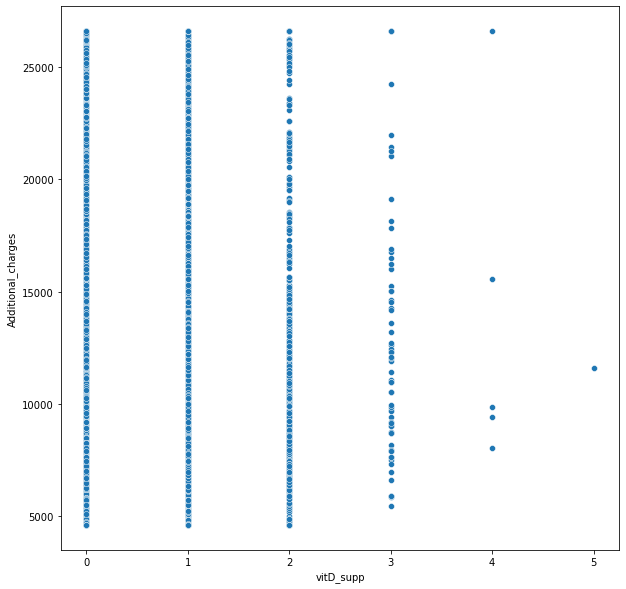

In [310]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='vitD_supp', y='Additional_charges', data=med_df)

([<matplotlib.axis.XTick at 0x2288b8098e0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

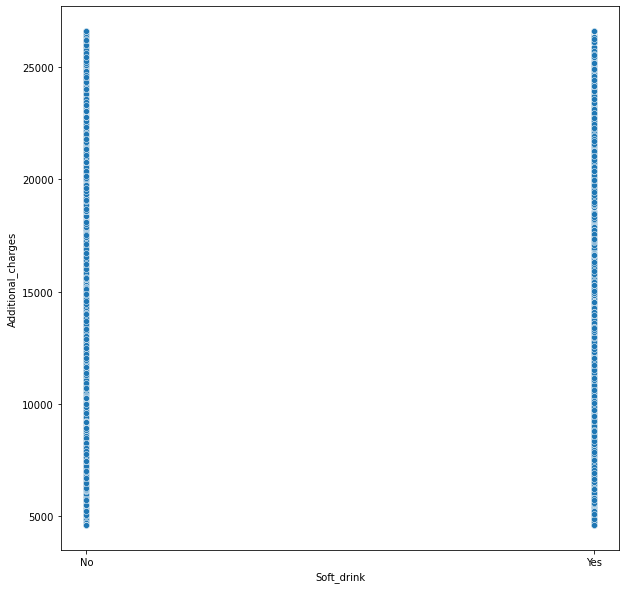

In [311]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='Soft_drink', y='Additional_charges', data=med_df)
plt.xticks([0,1], ['No', 'Yes'])

([<matplotlib.axis.XTick at 0x2288b804940>,
 [Text(1, 0, 'Emergency'), Text(2, 0, 'Elective'), Text(3, 0, 'Observation')])

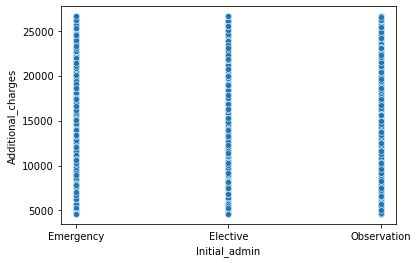

In [312]:

sns.scatterplot(x='Initial_admin', y='Additional_charges', data=med_df)
plt.xticks([1,2,3], ['Emergency', 'Elective', 'Observation'])

([<matplotlib.axis.XTick at 0x2288cf345b0>,
 [Text(1, 0, 'Low'), Text(2, 0, 'Medium'), Text(3, 0, 'High')])

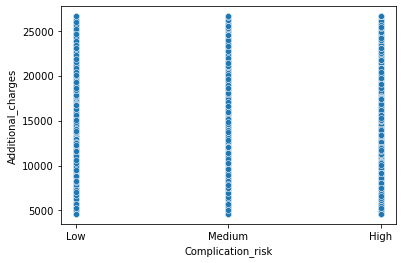

In [313]:
sns.scatterplot(x='Complication_risk', y='Additional_charges', data=med_df)
plt.xticks([1,2,3], ['Low', 'Medium', 'High'])

([<matplotlib.axis.XTick at 0x2288b6c4e50>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

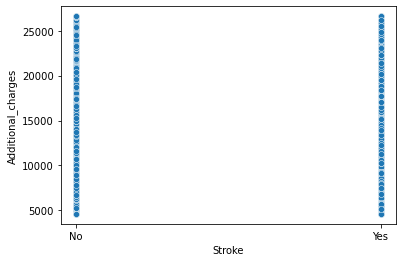

In [314]:
sns.scatterplot(x='Stroke', y='Additional_charges', data=med_df)
plt.xticks([0,1], ['No', 'Yes'])

([<matplotlib.axis.XTick at 0x2288b798d30>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

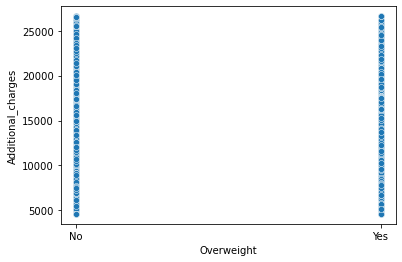

In [315]:
sns.scatterplot(x='Overweight', y='Additional_charges', data=med_df)
plt.xticks([0,1], ['No', 'Yes'])

([<matplotlib.axis.XTick at 0x2288b212070>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

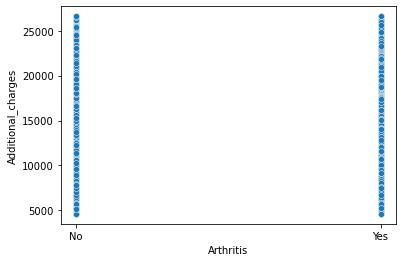

In [316]:
sns.scatterplot(x='Arthritis', y='Additional_charges', data=med_df)
plt.xticks([0,1], ['No', 'Yes'])

([<matplotlib.axis.XTick at 0x2288cf19310>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

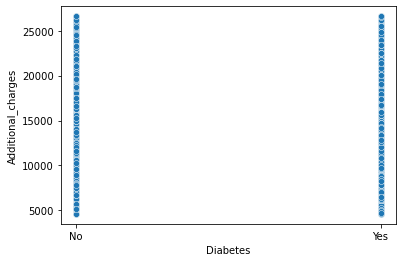

In [317]:
sns.scatterplot(x='Diabetes', y='Additional_charges', data=med_df)
plt.xticks([0,1], ['No', 'Yes'])

([<matplotlib.axis.XTick at 0x22890c6b940>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

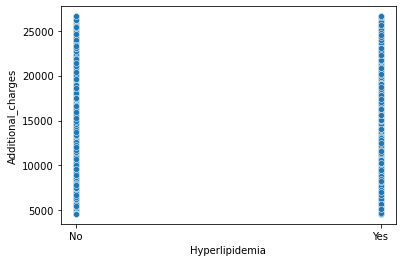

In [318]:
sns.scatterplot(x='Hyperlipidemia', y='Additional_charges', data=med_df)
plt.xticks([0,1], ['No', 'Yes'])

([<matplotlib.axis.XTick at 0x22892cdf2e0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

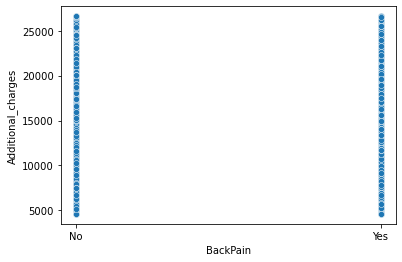

In [319]:
sns.scatterplot(x='BackPain', y='Additional_charges', data=med_df)
plt.xticks([0,1], ['No', 'Yes'])

([<matplotlib.axis.XTick at 0x2288b5a6d30>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

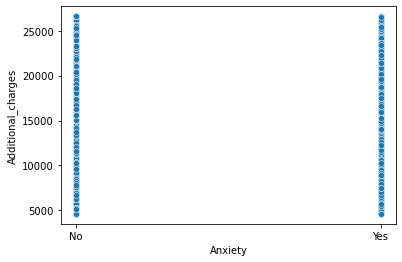

In [320]:
sns.scatterplot(x='Anxiety', y='Additional_charges', data=med_df)
plt.xticks([0,1], ['No', 'Yes'])

([<matplotlib.axis.XTick at 0x22892c06700>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

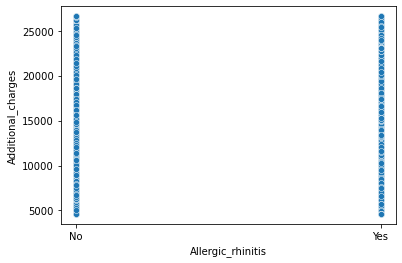

In [321]:
sns.scatterplot(x='Allergic_rhinitis', y='Additional_charges', data=med_df)
plt.xticks([0,1], ['No', 'Yes'])

([<matplotlib.axis.XTick at 0x2288b74be50>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

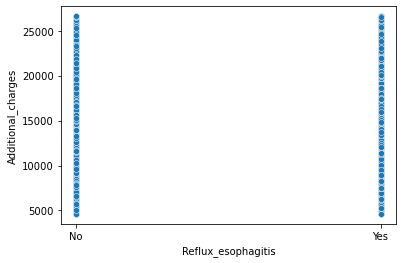

In [322]:
sns.scatterplot(x='Reflux_esophagitis', y='Additional_charges', data=med_df)
plt.xticks([0,1], ['No', 'Yes'])

([<matplotlib.axis.XTick at 0x22892c82880>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

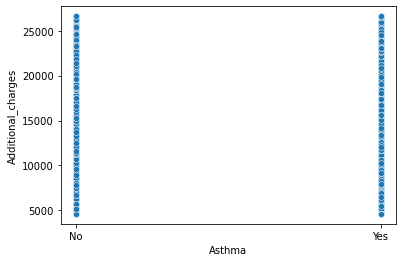

In [323]:
sns.scatterplot(x='Asthma', y='Additional_charges', data=med_df)
plt.xticks([0,1], ['No', 'Yes'])

([<matplotlib.axis.XTick at 0x22890cb5340>,
 [Text(1, 0, 'MRI'),
  Text(2, 0, 'CT Scan'),
  Text(3, 0, 'Blood Work'),
  Text(4, 0, 'Intravenous')])

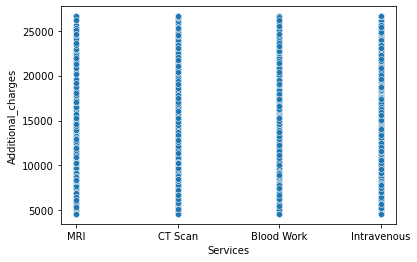

In [324]:
sns.scatterplot(x='Services', y='Additional_charges', data=med_df)
plt.xticks([1,2,3,4], ['MRI', 'CT Scan', 'Blood Work', 'Intravenous'])

<AxesSubplot:xlabel='Initial_days', ylabel='Additional_charges'>

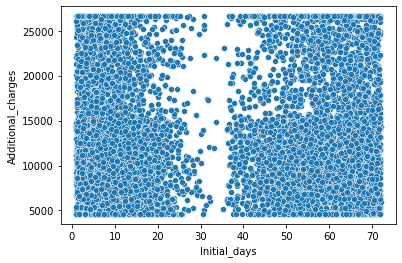

In [325]:
sns.scatterplot(x='Initial_days', y='Additional_charges', data=med_df)

<AxesSubplot:xlabel='TotalCharge', ylabel='Additional_charges'>

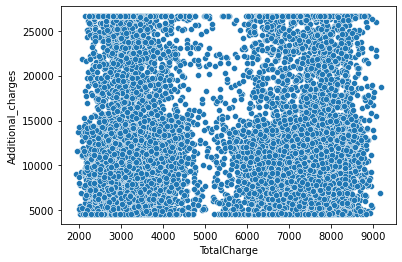

In [326]:
sns.scatterplot(x='TotalCharge', y='Additional_charges', data=med_df)

In [328]:
#extract prepared data set
med_df.to_csv('med_prep.csv')

In [329]:
med_prep=pd.read_csv('med_prep.csv')

In [330]:
med_prep.shape

(10000, 47)

In [331]:
print(med_prep.head)

<bound method NDFrame.head of       Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0              0          1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1              1          2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2              2          3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3              3          4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4              4          5     C544523  5885f56b-d6da-43a3-8760-83583af94266   
...          ...        ...         ...                                   ...   
9995        9995       9996     B863060  a25b594d-0328-486f-a9b9-0567eb0f9723   
9996        9996       9997     P712040  70711574-f7b1-4a17-b15f-48c54564b70f   
9997        9997       9998     R778890  1d79569d-8e0f-4180-a207-d67ee4527d26   
9998        9998       9999     E344109  f5a68e69-2a60-409b-a92f-ac0847b27db0   
9999        9999      10000     I569847  bc482c02-f8c9-4423-99de-3db5e62a18d5  

In [332]:
print(med_prep.columns)

Index(['Unnamed: 0', 'CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City',
       'State', 'County', 'Zip', 'TimeZone', 'Job', 'Children', 'Age',
       'Income', 'Marital', 'Gender', 'ReAdmis', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'Initial_admin',
       'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis',
       'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services',
       'Initial_days', 'TotalCharge', 'Additional_charges', 'TimelyAdmin',
       'TimelyTreat', 'TimelyVisit', 'Reliability', 'Options', 'HoursTreat',
       'StaffAtt', 'DocListen'],
      dtype='object')


In [333]:
#run regression model
mdl_med_all=ols('Additional_charges~Children+Age+Income+Marital+Gender+ReAdmis+VitD_levels+Doc_visits+Full_meals_eaten+vitD_supp+Soft_drink+Initial_admin+HighBlood+Stroke+Complication_risk+Overweight+Arthritis+Diabetes+Hyperlipidemia+BackPain+Anxiety+Allergic_rhinitis+Reflux_esophagitis+Asthma+Services+Initial_days+TotalCharge', data=med_prep).fit()


In [334]:
print(mdl_med_all.params)

Intercept            -3075.892419
Children                12.764004
Age                    217.739220
Income                  -0.000028
Marital                 -7.321429
Gender                -127.575256
ReAdmis                 81.170791
VitD_levels            -17.386317
Doc_visits             -16.118819
Full_meals_eaten        26.293751
vitD_supp              -16.258816
Soft_drink              21.751493
Initial_admin          -97.144999
HighBlood             8333.371778
Stroke                 324.580413
Complication_risk       98.543917
Overweight              28.224989
Arthritis              -92.775077
Diabetes                 7.968388
Hyperlipidemia         -46.526862
BackPain               -76.101601
Anxiety                -21.385518
Allergic_rhinitis      -43.691279
Reflux_esophagitis     -10.549541
Asthma                  48.273404
Services               -11.950132
Initial_days           -51.268027
TotalCharge              0.603221
dtype: float64


In [335]:
print(mdl_med_all.summary())

                            OLS Regression Results                            
Dep. Variable:     Additional_charges   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     5739.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:06:29   Log-Likelihood:                -87694.
No. Observations:               10000   AIC:                         1.754e+05
Df Residuals:                    9972   BIC:                         1.756e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3075.8924    314

In [337]:
med_bivar=med_prep[['Children', 'Age',
       'Income', 'Marital', 'Gender', 'ReAdmis', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'Initial_admin',
       'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis',
       'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services',
       'Initial_days', 'TotalCharge', 'Additional_charges']]

AxesSubplot(0.125,0.125;0.62x0.755)


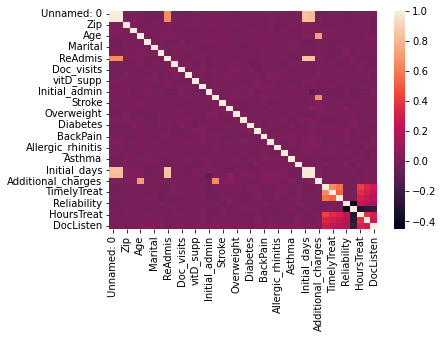

In [338]:
#heatmap to determine strength of relationships
print(sns.heatmap(med_prep.corr(), annot=False))

In [1]:
mdl_med_reduce=ols('Additional_charges~Age+Stroke+HighBlood+Complication_risk+Overweight+Diabetes+Anxiety+Asthma+Services+Initial_days', data=med_prep).fit()
print(mdl_med_reduce.summary())

NameError: name 'ols' is not defined

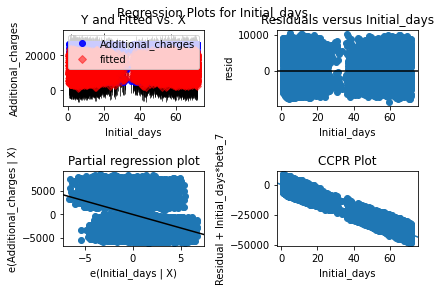

In [340]:
sm.graphics.plot_regress_exog(mdl_med_reduced, 'Initial_days')
plt.show()

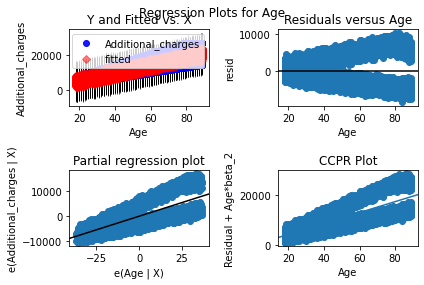

In [341]:
# creating regression plots
sm.graphics.plot_regress_exog(mdl_med_reduced, 'Age')
plt.show()

In [342]:
#make predictions
#create prediction data frames
age_p=np.arange(1,101,2)
stroke_p=np.arange(0,2,1)
blood_p=np.arange(0,2,1)
complication_p=np.arange(0,4,1)
overweight_p=np.arange(0,2,1)
diabetes_p=np.arange(0,2,1)
anxiety_p=np.arange(0,2,1)
asthma_p=np.arange(0,2,1)
services_p=np.arange(0,5,1)
initial_p=np.arange(0,101,2)

In [343]:
p=product(age_p, stroke_p, blood_p, complication_p, overweight_p, diabetes_p, anxiety_p, asthma_p, services_p, initial_p)

In [344]:
exp_data=pd.DataFrame(p, columns=['Age', 'Stroke', 'HighBlood', 'Complication_risk', 'Overweight', 'Diabetes', 'Anxiety', 'Asthma', 'Services', 'Initial_days'])

In [345]:
print(exp_data)

         Age  Stroke  HighBlood  Complication_risk  Overweight  Diabetes  \
0          1       0          0                  0           0         0   
1          1       0          0                  0           0         0   
2          1       0          0                  0           0         0   
3          1       0          0                  0           0         0   
4          1       0          0                  0           0         0   
...      ...     ...        ...                ...         ...       ...   
3263995   99       1          1                  3           1         1   
3263996   99       1          1                  3           1         1   
3263997   99       1          1                  3           1         1   
3263998   99       1          1                  3           1         1   
3263999   99       1          1                  3           1         1   

         Anxiety  Asthma  Services  Initial_days  
0              0       0         0  

In [346]:
predict=exp_data.assign(Additional_charges=mdl_med_reduce.predict(exp_data))

In [347]:
print(predict)

         Age  Stroke  HighBlood  Complication_risk  Overweight  Diabetes  \
0          1       0          0                  0           0         0   
1          1       0          0                  0           0         0   
2          1       0          0                  0           0         0   
3          1       0          0                  0           0         0   
4          1       0          0                  0           0         0   
...      ...     ...        ...                ...         ...       ...   
3263995   99       1          1                  3           1         1   
3263996   99       1          1                  3           1         1   
3263997   99       1          1                  3           1         1   
3263998   99       1          1                  3           1         1   
3263999   99       1          1                  3           1         1   

         Anxiety  Asthma  Services  Initial_days  Additional_charges  
0              0

In [348]:
influence=mdl_med_reduce.get_influence()

In [349]:
standardized_residuals = influence.resid_studentized_internal

In [350]:
print(standardized_residuals)

[ 0.12971569  0.11309454 -0.10919426 ... -0.53500185  0.48707834
 -0.63598006]


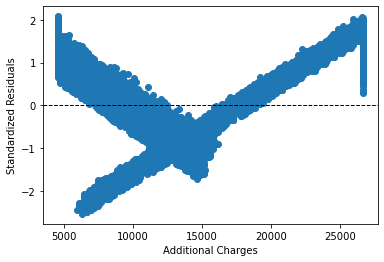

In [351]:
plt.scatter(med_df['Additional_charges'], standardized_residuals)
plt.xlabel('Additional Charges')
plt.ylabel('Standardized Residuals')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()

In [352]:
med_df.to_csv(r'C:/Users/kr529097/Desktop/MSDA/med_prep208.csv')